# Лабораторная работа №2 по Wolfram

## НОД и расширенный алгоритм Евклида

### Ильиных В.М. М8О-201Б-19

### Вариант 4

In [1]:
f = 5*x^5 - 21*x^4 + 23*x^3 - 37*x^2 + 77*x - 7;
g = 10*x^4 - 42*x^3 + 56*x^2 - 26*x + 2;

In [3]:
myBezoutPoly[aa_, bb_]:=Module[
            {a=aa, b=bb
                , x0=1
                , xx=0
                , y0=0
                , yy = 1
                , q, r
            }
            ,
            While[
                Not[SameQ[b, 0]]
                ,
                    q = PolynomialQuotient[a, b,x];
                    r = PolynomialRemainder[a, b,x];
                    {a, b} = {b, r};
                    {x0, xx} = {xx, (x0 - xx*q)//ExpandAll};
                    {y0, yy} = {yy, (y0 - yy*q)//ExpandAll};

            ];
            {x0, y0, a}
        ];

In [4]:
lastCoef[poly_, x_] := Coefficient[
            poly
            , x
            , Exponent[poly, x]
        ]

НОД полиномов f и g, полученный от стандартного метода Wolfram 

In [5]:
wolfGcd = PolynomialGCD[f, g];
wolfGcd // TraditionalForm

FormBox[RowBox[{RowBox[{"5", " ", SuperscriptBox["x", "2"]}], "-", 

 
>        RowBox[{"11", " ", "x"}], "+", "1"}], TraditionalForm]

Нормализуем полином и получаем

FormBox[RowBox[{SuperscriptBox["x", "2"], "-", 

 
>        FractionBox[RowBox[{"11", " ", "x"}], "5"], "+", FractionBox["1", "5"]}], 

 
>      TraditionalForm]
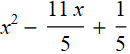

In [7]:
coef = lastCoef[wolfGcd, x];
normWolfGcd = Simplify[wolfGcd / coef];
normWolfGcd // TraditionalForm

Полученный НОД от собственного алгоритма

In [10]:
{u, v, myGcd} = myBezoutPoly[f, g];
myGcd // TraditionalForm

FormBox[RowBox[{RowBox[{"640", " ", SuperscriptBox["x", "2"]}], "-", 

 
>        RowBox[{"1408", " ", "x"}], "+", "128"}], TraditionalForm]

Нормализуем полином и получаем

FormBox[RowBox[{SuperscriptBox["x", "2"], "-", 

 
>        FractionBox[RowBox[{"11", " ", "x"}], "5"], "+", FractionBox["1", "5"]}], 

 
>      TraditionalForm]
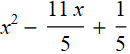

In [12]:
coef = lastCoef[myGcd, x];
normMyGcd = Simplify[myGcd / coef];
normMyGcd // TraditionalForm

Сравниваем полученные НОД от wolfram и от нашей функции

Полиномы одинаковы:
FormBox[RowBox[{SuperscriptBox["x", "2"], "-", 

 
>        FractionBox[RowBox[{"11", " ", "x"}], "5"], "+", FractionBox["1", "5"]}], 

 
>      TraditionalForm]

FormBox[RowBox[{SuperscriptBox["x", "2"], "-", 

 
>        FractionBox[RowBox[{"11", " ", "x"}], "5"], "+", FractionBox["1", "5"]}], 

 
>      TraditionalForm]
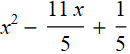
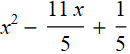

In [15]:
If[TautologyQ[normWolfGcd == normMyGcd], "Полиномы одинаковы:", "Что-то пошло не так:"]
normWolfGcd // TraditionalForm
normMyGcd // TraditionalForm

Проверяем, что выражение *f*u + *g*v равно нашему полученному НОД

FormBox[RowBox[{RowBox[{RowBox[{RowBox[{"(", 

 
>              RowBox[{RowBox[{"-", RowBox[{SuperscriptBox["x", "2"]}]}], "+", 

 
>                RowBox[{"9", " ", "x"}], "+", "1"}], ")"}], " ", 

 
>            RowBox[{"(", RowBox[{RowBox[{"10", " ", SuperscriptBox["x", "4"]}], "-", 

 
>                RowBox[{"42", " ", SuperscriptBox["x", "3"]}], "+", 

 
>                RowBox[{"56", " ", SuperscriptBox["x", "2"]}], "-", 

 
>                RowBox[{"26", " ", "x"}], "+", "2"}], ")"}]}], "+", 

 
>          RowBox[{RowBox[{"(", RowBox[{RowBox[{"2", " ", "x"}], "-", "18"}], ")"}], "\
 
>    ", 
         RowBox[{"(", RowBox[{RowBox[{"5", " ", SuperscriptBox["x", "5"]}],\
 
>    "-", 
             RowBox[{"21", " ", SuperscriptBox["x", "4"]}], "+", 

 
>                RowBox[{"23", " ", SuperscriptBox["x", "3"]}], "-", 

 
>                RowBox[{"37", " ", SuperscriptBox["x", "2"]}], "+", 

 
>                RowBox[{"77", " ", "x"}], "-", "7"}], ")"}]}]}], "", 

 
>        RowBox[{SuperscriptBox["x", "2"], "-", 

 
>          FractionBox[RowBox[{"11", " ", "x"}], "5"], "+", FractionBox["1", "5"]}]}], 

 
>      TraditionalForm]

FormBox[RowBox[{RowBox[{"128", " ", 

 
>          RowBox[{"(", RowBox[{RowBox[{"5", " ", SuperscriptBox["x", "2"]}], "-", 

 
>              RowBox[{"11", " ", "x"}], "+", "1"}], ")"}]}], "", 

 
>        RowBox[{SuperscriptBox["x", "2"], "-", 

 
>          FractionBox[RowBox[{"11", " ", "x"}], "5"], "+", FractionBox["1", "5"]}]}], 

 
>      TraditionalForm]

FormBox[RowBox[{RowBox[{FractionBox["1", "5"], " ", 

 
>          RowBox[{"(", RowBox[{RowBox[{"5", " ", SuperscriptBox["x", "2"]}], "-", 

 
>              RowBox[{"11", " ", "x"}], "+", "1"}], ")"}]}], "", 

 
>        RowBox[{SuperscriptBox["x", "2"], "-", 

 
>          FractionBox[RowBox[{"11", " ", "x"}], "5"], "+", FractionBox["1", "5"]}]}], 

 
>      TraditionalForm]

f*u + g*v == полученному НОД
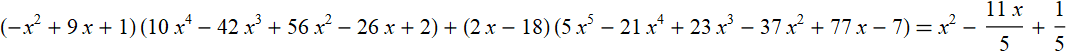
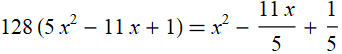
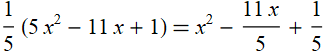

In [18]:
left = f * u + g * v;
left == normMyGcd // TraditionalForm
Simplify[left] == normMyGcd // TraditionalForm
Simplify[left]/coef == normMyGcd // TraditionalForm
If[TautologyQ[Simplify[Simplify[left]/coef] == normMyGcd], "f*u + g*v == полученному НОД", "No"]